In [1]:
from source.util import utils as u
from source import metrics, plots
from source import scargc, hs
import sys
import time
import os
import psutil
import resource
import numpy as np
from sklearn.metrics import accuracy_score, matthews_corrcoef, f1_score

In [2]:
poolsize = 150
clusters = 2
n_components = 2
step = 10

# base = '/home/localuser/Documentos/procopio/ccomp/tcc/datasets/'
base = '/home/test/Documentos/Handshake-TCC/datasets/'

#   list = ['1CSurr.txt', '2CDT.txt', '2CHT.txt']# 'NOAA.txt', 'elec.txt', 'keystroke.txt']
# list = ['keystroke.txt']
list = ['spam_corpus.txt']


array_ep = [0.15]#, 0.10, 0.15]
array_p = [20]#,20, 30]
k = 5

adr = base + list[0]


In [3]:
dataset, data_labeled, dataset_train, l_train, stream, l_stream, n_features = u.criar_datasets(5, adr, 0)

# print(dataset_train)

ValueError: invalid literal for int() with base 10: 'spam'

In [4]:

start = time.time()
predicted, updt, clustering = hs.handshakePCA(dataset, data_labeled, dataset_train, l_train, stream, l_stream, n_components, n_features, array_ep[0], array_p[0], k, 1)
# predicted, updt = scargc.newScargc(dataset, data_labeled, dataset_train, l_train, stream, l_stream, poolsize, clusters, n_features, k)

# predictedHS, updt, clustering = hs.handshakePCA(dataset, data_labeled, dataset_train, l_train, stream, l_stream, n_components, n_features, array_ep[0], array_p[0], k)
end = time.time()

In [5]:
tempo = end - start

acc_percent, f1_percent, mcc_percent = metrics.makeBatches(l_stream, predicted, len(stream), step)
score, f1, mcc, std = metrics.metrics(acc_percent, l_stream, predicted, step, f1_type = 'macro')

In [6]:
# print('memory peak: ', mem)
print('Acc: ', score)
print('Macro-F1: ', f1)
print('MCC: ', mcc)
print('Desvio Padrão: ', std)
print('Numero de atualizações: ', updt)
print('Tempo: ', tempo)

Acc:  0.7313598519888991
Macro-F1:  0.7315407971637679
MCC:  0.4934333511741581
Desvio Padrão:  0.0796518579637927
Numero de atualizações:  217
Tempo:  3.2208800315856934


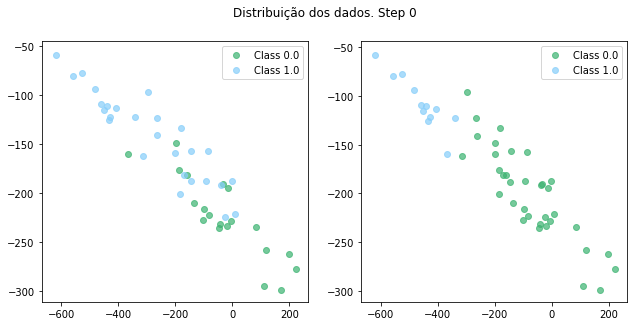

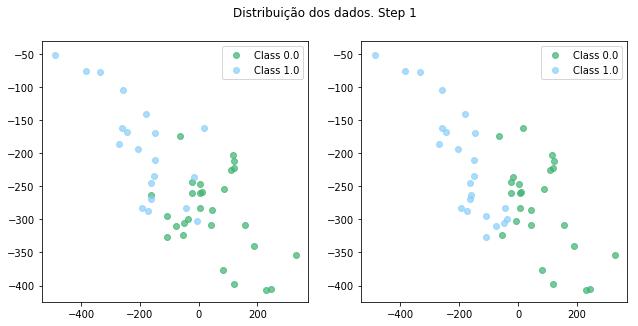

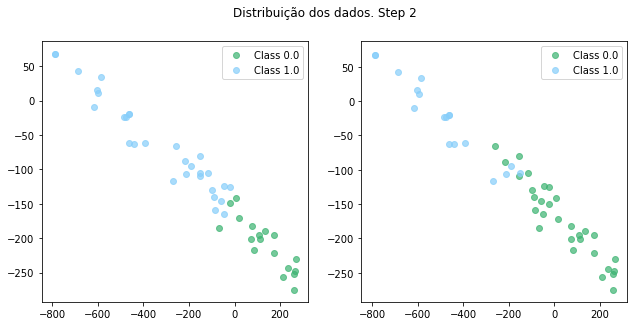

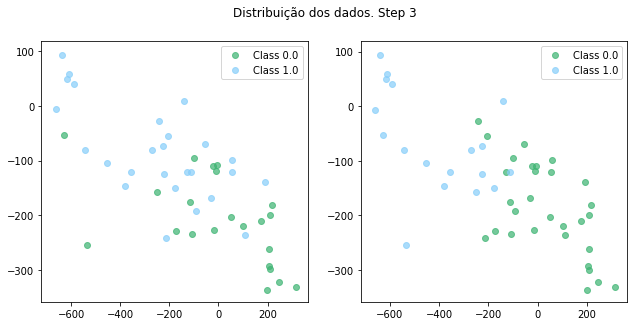

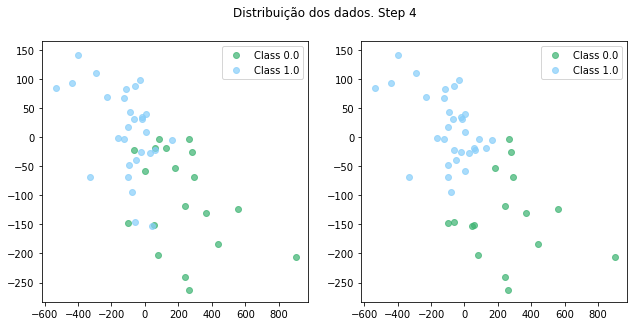

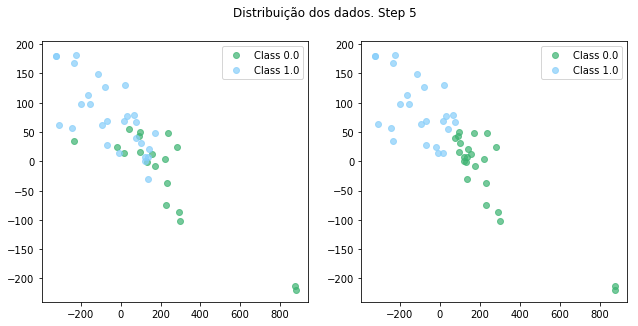

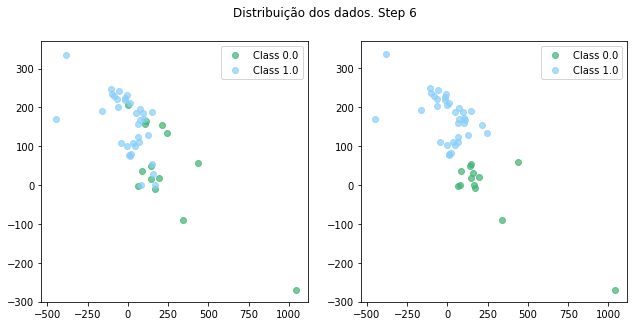

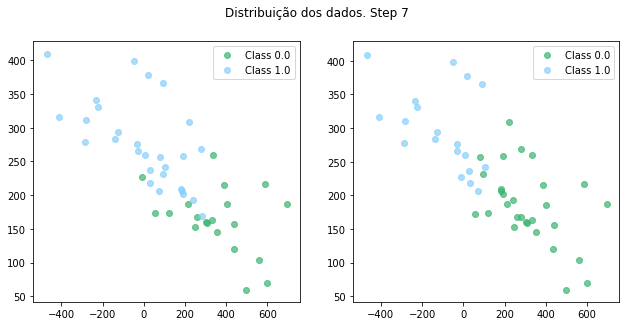

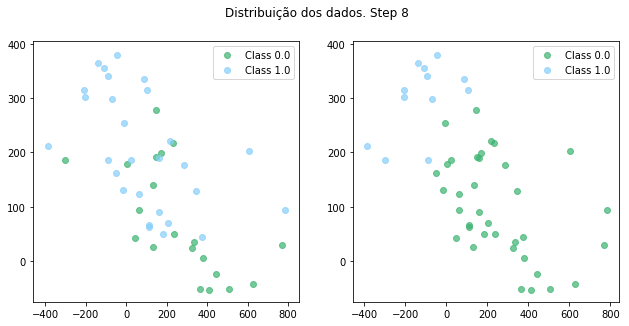

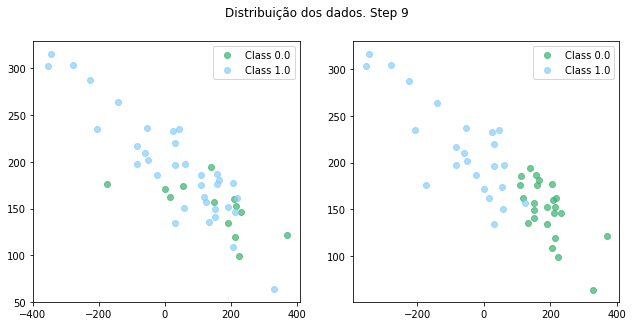

In [7]:
plots.plotPerBatches(stream, predicted, l_stream, len(stream), step)

In [8]:
start = time.time()
predicted, updt, clustering = hs.handshake2(dataset, data_labeled, dataset_train, l_train, stream, l_stream, n_components, n_features, array_ep[0], array_p[0], k)
# predicted, updt = scargc.newScargc(dataset, data_labeled, dataset_train, l_train, stream, l_stream, poolsize, clusters, n_features, k)

end = time.time()

tempo = end - start

acc_percent, f1_percent, mcc_percent = metrics.makeBatches(l_stream, predicted, len(stream), step)
score, f1, mcc, std = metrics.metrics(acc_percent, l_stream, predicted, step, f1_type = 'macro')

/opt/anaconda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda/lib/python3.7/site-packages/sklearn/metrics/classification.py:543: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


In [9]:
# print('memory peak: ', mem)
print('Acc: ', score)
print('Macro-F1: ', f1)
print('MCC: ', mcc)
print('Desvio Padrão: ', std)
print('Numero de atualizações: ', updt)
print('Tempo: ', tempo)

Acc:  0.5970397779833487
Macro-F1:  0.3735255570117956
MCC:  0.0
Desvio Padrão:  0.08027044017127966
Numero de atualizações:  219
Tempo:  2.7547976970672607
